<a href="https://colab.research.google.com/github/aaolcay/Convolutional-Neural-Network-Examples/blob/main/mnist_dataset_KerasAPI_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CNN for `mnist` Dataset**
In this notebook, we applied one simple CNN architecture by using Keras API. 

In [48]:
import tensorflow.keras as keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

### **Load Dataset**
Data chosen in this implementation is quite famous, and most of the tutorials on CNNs include this dataset as it is very easy to load and to use with CNN model considering model's high accuracy score.

In [49]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#### **Data Shapes**
We need to know the data shape and which type of data we deal with. This should also be noticed that 2 dimensional convolutional layer (`Conv2D`) needs a shape of (**#samples**, **height**, **width**, **#channels**). For example, imagine that we have 200 training data consist of images whose heights (i.e., #rows) are 28 and widths are 28 (i.e., #columns) as well. For colorful image the number of channels is 3 (RGB: Red, Green, Blue) but gray images have only one channel that is what we consider in this implementation for making prediction.  

In [50]:
print(f'The shape of training data is : {x_train.shape}.\nThe shape of test data is {x_test.shape}')

The shape of training data is : (60000, 28, 28).
The shape of test data is (10000, 28, 28)


The data shapes are not appropriate to be used within the 2D convolutional layers. Therefore, we need to add channel number to the datasets.

                                  (60000, 28, 28) -> (60000, 28, 28, 1)

                                  (10000, 28, 28) -> (10000, 28, 28, 1)


In [51]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
print(f'The shape of training data is : {x_train.shape}.\nThe shape of test data is {x_test.shape}')

The shape of training data is : (60000, 28, 28, 1).
The shape of test data is (10000, 28, 28, 1)


Let's now look at the labels and convert them to categorical form. Watch out CNN is a deep learning model and needs labeled data that makes it a supervised method. 

In [52]:
print(f'Labels of train dataset: {y_train[:20]}\nLabels of test dataset: {y_test[:20]}')
print(f'The shape of training data is : {y_train.shape}.\nThe shape of test data is {y_test.shape}')
ytrain = y_train.copy()
ytest = y_test.copy()

Labels of train dataset: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Labels of test dataset: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
The shape of training data is : (60000,).
The shape of test data is (10000,)


Visualize each label with the data (images of numbers).

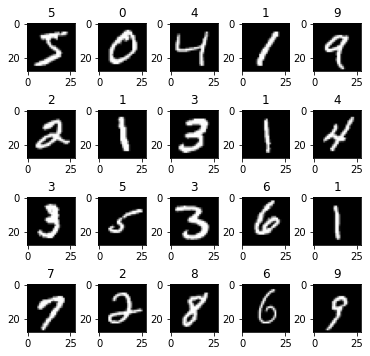

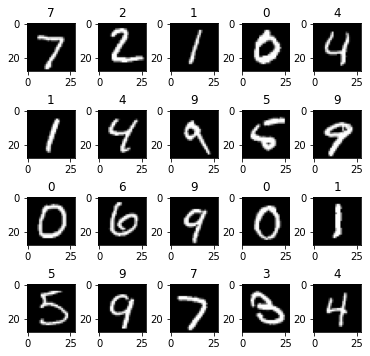

In [53]:
fig = plt.figure(figsize=(5,5))
for i in range(20):
  x_test[i,:,:,:]
  fig.add_subplot(4,5,i+1)
  plt.imshow(x_train[i,:,:,:], cmap='gray')
  plt.title(f'{y_train[i]}')
  fig.tight_layout(pad=0.2)

fig = plt.figure(figsize=(5,5))
for k in range(20):
  fig.add_subplot(4,5,k+1)
  plt.imshow(x_test[k,:,:,:], cmap='gray')
  plt.title(f'{y_test[k]}')
  fig.tight_layout(pad=0.2)

Now, let's convert each label into categorical from:

0 -> [1 0 0 0 0 0 0 0 0 0]

1 -> [0 1 0 0 0 0 0 0 0 0]

2 -> [0 0 1 0 0 0 0 0 0 0]

3 -> [0 0 0 1 0 0 0 0 0 0]

4 -> [0 0 0 0 1 0 0 0 0 0]

5 -> [0 0 0 0 0 1 0 0 0 0]

6 -> [0 0 0 0 0 0 1 0 0 0]

7 -> [0 0 0 0 0 0 0 1 0 0]

8 -> [0 0 0 0 0 0 0 0 1 0]

9 -> [0 0 0 0 0 0 0 0 0 1]

In [54]:
num_class = 10
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [55]:
for i in range(20):
  print(f'Labels of train dataset:\n{ytrain[i]}->{y_train[i]}\nLabels of test dataset:\n{ytest[i]}->{y_test[i]}')

print(f'The shape of training data is : {y_train.shape}.\nThe shape of test data is {y_test.shape}')

Labels of train dataset:
5->[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Labels of test dataset:
7->[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Labels of train dataset:
0->[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
2->[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
4->[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Labels of test dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
0->[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
9->[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Labels of test dataset:
4->[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Labels of train dataset:
2->[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
4->[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Labels of train dataset:
3->[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
9->[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Labels of train dataset:
1->[0. 1. 0. 0. 0. 0. 0

### **Build CNN architecture**

In [56]:
model_input = keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]), # As it is the first layer, needs to enter input shape
                                 name='conv2d_input')

#######################################################
#-------------- 1st convolutional layer --------------#
#------------------ with 64 filters ------------------#
#######################################################
conv_layer_1 = keras.layers.Conv2D(64, 
                              kernel_size=(3,3), # filter/grid size
                              activation='relu', # Rectified Linear Unit used as an activation function
                              padding='same', # zero padding to apply filters into whole image pixels 
                              name='conv_layer_1')

conv_layer_1 = conv_layer_1(model_input)
conv_layer_1 = keras.layers.MaxPool2D((3,3), # grid size
                                     strides=(2,2), # strides
                                     padding='same',# applies max pooling to whole input
                                     name='max_pool_1')(conv_layer_1)
conv_layer_1 = keras.layers.BatchNormalization()(conv_layer_1) # standardizes/normalizes the contributions
                                                 # to a layer for every mini-batch

#######################################################
#-------------- 2nd convolutional layer --------------#
#------------------ with 32 filters ------------------#
#######################################################
conv_layer_2 = keras.layers.Conv2D(32,
                              kernel_size=(3,3),
                              activation='relu',
                              padding='same',
                              name='conv_layer_2')

conv_layer_2 = conv_layer_2(conv_layer_1)
conv_layer_2 = keras.layers.MaxPool2D((3,3),
                                     strides=(2,2),
                                     padding='same',
                                     name='max_pool_2')(conv_layer_2)
conv_layer_2 = keras.layers.BatchNormalization()(conv_layer_2)

#######################################################
#---------------------- Flatten ----------------------#
#######################################################
flatten = keras.layers.Flatten()(conv_layer_2)

#######################################################
#------------------ Fully Connected ------------------#
#######################################################
fully_connected = keras.layers.Dense(32, 
                                     activation='relu', 
                                     name='fully_connected_layer')(flatten)
# to avoid overfitting we add dropout
fully_connected = keras.layers.Dropout(0.3)(fully_connected)

#######################################################
#-------------------- Output Layer -------------------#
#######################################################
model_output = keras.layers.Dense(10, # number of classes
                                  activation='softmax', 
                                  name='model_output')(fully_connected)


In [57]:
# Make this network a model
conv_model = keras.Model(model_input, model_output, name='conv_model_aao')

In [58]:
conv_model.summary()

Model: "conv_model_aao"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 32)        18464     
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 7, 7, 32)          0         
                                                    

In [59]:
# Compile the model
conv_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
# Train the model
history = conv_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), shuffle=True, verbose =1)

Epoch 1/20
1875/1875 [==============================] - 101s 53ms/step - loss: 0.0713 - accuracy: 0.8950 - val_loss: 0.0115 - val_accuracy: 0.9857
Epoch 2/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0265 - accuracy: 0.9649 - val_loss: 0.0102 - val_accuracy: 0.9876
Epoch 3/20
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0202 - accuracy: 0.9740 - val_loss: 0.0084 - val_accuracy: 0.9900
Epoch 4/20
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0178 - accuracy: 0.9768 - val_loss: 0.0076 - val_accuracy: 0.9890
Epoch 5/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0155 - accuracy: 0.9799 - val_loss: 0.0072 - val_accuracy: 0.9908
Epoch 6/20
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0144 - accuracy: 0.9811 - val_loss: 0.0080 - val_accuracy: 0.9900
Epoch 7/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0129 - accuracy: 0.9836 - val_loss: 0.0070

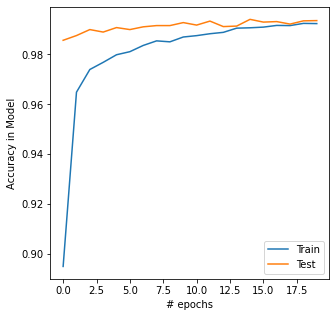

In [61]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('# epochs')
plt.ylabel('Accuracy in Model')
plt.legend()

Text(0, 0.5, 'Loss in Model')

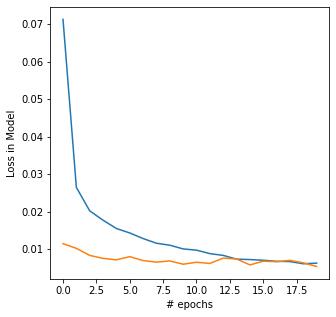

In [62]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('# epochs')
plt.ylabel('Loss in Model')

In [63]:
# Prediction
predictions = conv_model.predict(x_test[:10])

1/1 [==============================] - 0s 125ms/step


In [64]:
predictions

array([[0.00000000e+00, 2.39301033e-35, 4.72205955e-32, 0.00000000e+00,
        1.56789732e-34, 0.00000000e+00, 0.00000000e+00, 9.99999940e-01,
        0.00000000e+00, 1.01357698e-36],
       [1.95509166e-22, 8.52958869e-19, 9.99999940e-01, 7.62192812e-21,
        4.26685839e-23, 1.14450393e-23, 9.05522705e-23, 9.05277643e-15,
        6.32993545e-17, 1.37404304e-28],
       [2.86158733e-37, 9.99999940e-01, 5.53014269e-28, 4.10609489e-36,
        1.83467872e-21, 6.96427515e-27, 2.32967188e-27, 2.02192828e-23,
        8.10909883e-23, 1.03255100e-29],
       [9.99999940e-01, 2.38791598e-25, 7.78688462e-22, 5.55600590e-27,
        1.48870352e-18, 1.53255226e-20, 1.68732920e-16, 2.37102735e-22,
        1.28111781e-17, 4.73914868e-17],
       [4.47058042e-34, 1.12209809e-22, 3.08892021e-25, 5.42225330e-34,
        9.99999940e-01, 1.09693066e-26, 3.06598112e-25, 3.43059387e-25,
        9.01112404e-22, 5.78631326e-18],
       [5.19657859e-34, 9.99999940e-01, 2.31132182e-27, 2.83984765e-38,
   

In [65]:
predictions = np.argmax(predictions,axis=1)

In [66]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

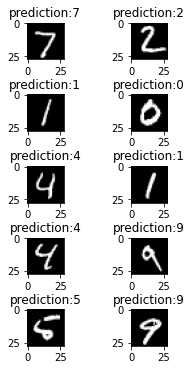

In [67]:
fig = plt.figure(figsize=(5,5))
for k in range(len(predictions)):
  fig.add_subplot(5,2,k+1)
  plt.imshow(x_test[k], cmap='gray')
  plt.title(f'prediction:{predictions[k]}')
  fig.tight_layout(pad=0.2)